# Prediction of scores by hours (Task 1)

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
%matplotlib inline

In [4]:

data=pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')

In [5]:
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [6]:
from sklearn.model_selection import train_test_split


In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
x=data['Hours']
y=data['Scores']
x = np.array([x]).reshape(-1,1)




In [9]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=101)

In [10]:
lm=LinearRegression()

In [11]:
lm.fit(x_train,y_train)

LinearRegression()

In [12]:
a=lm.intercept_

In [13]:
b=lm.coef_

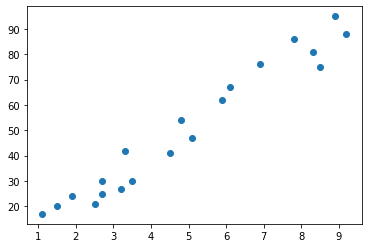

In [14]:
plt.scatter(x_train,y_train)

In [15]:
print(x_test)

[[2.5]
 [7.7]
 [3.8]
 [7.4]
 [5.5]]


In [16]:
line=b*x+a

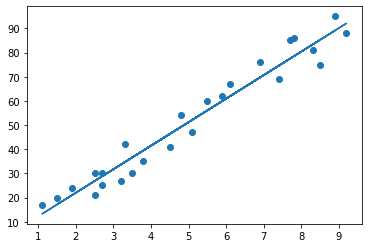

In [17]:
plt.scatter(x,y)
plt.plot(x,line)

In [18]:
y_pred=lm.predict(x_test)

In [19]:
panda=pd.DataFrame({'Actual':y_test,"predicted":y_pred})
panda

,Actual,predicted
16,30,26.845397
10,85,77.458594
22,35,39.498696
19,69,74.538601
7,60,56.045318


In [20]:
hours = [[9.25]]
own_pred = lm.predict(hours)

print("Predicted Score = {}".format(own_pred[0]))

Predicted Score = 92.54521954029958


# Iris Dataset clustering ( Task 2)

In [21]:
from sklearn.cluster import KMeans

In [22]:
from sklearn import datasets
iris=datasets.load_iris()

In [23]:
iris_df=pd.DataFrame(iris.data,columns=iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


<function matplotlib.pyplot.show(close=None, block=None)>

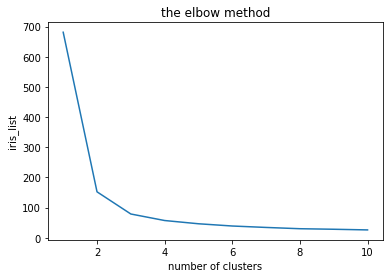

In [24]:
iris_list=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,max_iter=300,n_init=10,random_state=0)
    kmeans.fit(iris_df)
    iris_list.append(kmeans.inertia_)
plt.plot(range(1,11),iris_list)
plt.title("the elbow method")
plt.xlabel('number of clusters')
plt.ylabel('iris_list')
plt.show

In [25]:
kmeans=KMeans(n_clusters=3,max_iter=300,n_init=10,random_state=0)
y_means=kmeans.fit_predict(iris_df)

In [26]:
y_means

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [27]:
iris_df['clusters']=y_means

In [28]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),clusters
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


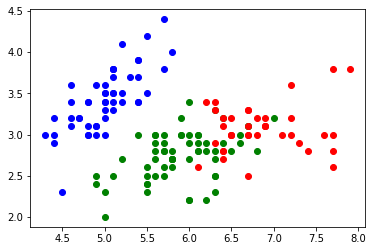

In [29]:

iris_df1=iris_df[iris_df['clusters']==0]
iris_df2=iris_df[iris_df['clusters']==1]
iris_df3=iris_df[iris_df['clusters']==2]
plt.scatter(iris_df1['sepal length (cm)'],iris_df1['sepal width (cm)'],color='green')
plt.scatter(iris_df2['sepal length (cm)'],iris_df2['sepal width (cm)'],color='blue')
plt.scatter(iris_df3['sepal length (cm)'],iris_df3['sepal width (cm)'],color='red')
plt.show()

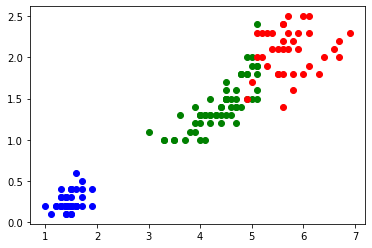

In [30]:
plt.scatter(iris_df1['petal length (cm)'],iris_df1['petal width (cm)'],color='green')
plt.scatter(iris_df2['petal length (cm)'],iris_df2['petal width (cm)'],color='blue')
plt.scatter(iris_df3['petal length (cm)'],iris_df3['petal width (cm)'],color='red')
plt.show()

In [ ]:
!p